## Import tools

In [251]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import pandas as pd
import seaborn as sns

## Create data

In [252]:
np.random.seed(1)
X, y = make_classification(n_samples=200,n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1)

In [253]:
X.shape

(200, 2)

In [254]:
y.shape

(200,)

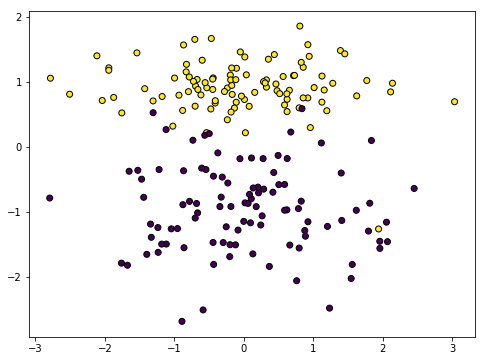

In [255]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:, 1], marker='o', c=y, edgecolors='k')

In [256]:
X[:10,:]

array([[ 1.23225307, -2.47410149],
       [-0.10679399,  1.21417321],
       [-0.89055558, -2.67772702],
       [ 1.19268607,  0.56160925],
       [-0.8301719 ,  1.15856878],
       [ 1.95487808, -1.44594526],
       [-0.19505734,  1.10997919],
       [-0.34498721, -0.91240907],
       [-0.23643695,  0.91176636],
       [-1.30653407,  0.71240572]])

In [257]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [258]:
X_train.shape

(160, 2)

In [259]:
X_test.shape

(40, 2)

## Create model

In [260]:
class ClassificationLinearCustom():
    """
        Implementation Classification Linear Model.
    """
    
    def __init__(self, learning_rate=0.0001, max_iter=100):
        """
            Initializer parameters model
        """
        self.lrate=learning_rate
        self.max_iter=max_iter
        self.coefs_=None
        self.error_gradient = None
        self.is_fited = False
        
    def sigmoid(self, coefs, x):
        """
            Sigmoid funtion
        """
        return 1/(1+np.exp(-(coefs*x).sum()))
        
    def error_coefs(self, coefs, xi, yi, m, lr):
        """
            Calcul coefs gradient:
            -- Parameters :
                - xi : value for one sample in data
                - yi : real value prediction for this precedent sample
                - m : dataset size
                - lr : learning rate
        """
        return lr/m * (xi.T*self.sigmoid(coefs, xi)-yi)
        
    
    def fit(self,x, y):
        """
            Fit fuction, learning parameters
            -- Parameters:
                - x, sample data
                - y, predict data
        """
        #scalling data
        x = (x-x.min())/(x.max()-x.min())
        
        if x.shape[0] != y.shape[0]:
            return ValueError("x and y must have same sample")
        
        m = x.shape[0] # size du dataset
        self.coefs_ = 1 # nuers of features
        for _ in range(self.max_iter):
            for xi,yi in zip(x,y):
                self.coefs_ -= self.error_coefs(self.coefs_, xi, yi, m, self.lrate) 
         
        self.is_fited = True
        print('ClassificationLinearCustom(learning_rate={}, max_iter={})'.format(self.lrate, self.max_iter))
    
    def predict(self, x):
        """
            Predict function : 
            -- Parameters:
                - x, sample data what to predict
        """
        ypred_proba = []
        if not self.is_fited:
            return ValueError("model must fited after predict")
        if x.shape[1] != self.coefs_.shape[0]:
            return ValueError("The features of x do not have the same size as those to train")
        for xi in x:
            ypred_proba +=[1] if self.sigmoid(self.coefs_, xi) > 0.5 else [0]
        return np.array(ypred_proba)

## Test Model Custom

In [261]:
cf = ClassificationLinearCustom()

In [262]:
cf.fit(X_train, y_train)

ClassificationLinearCustom(learning_rate=0.0001, max_iter=100)


In [263]:
cf.coefs_

array([1.00140568, 1.00136496])

In [264]:
from sklearn.metrics import accuracy_score

In [265]:
yp = cf.predict(X_test)

In [266]:
yp

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1])

### Decision boundary training

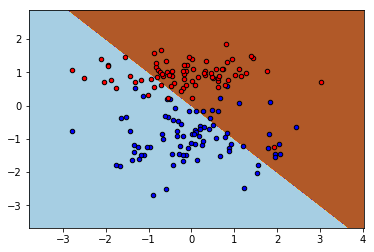

In [267]:
h = .02
colors = "bry"
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = cf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis('tight')

for i, color in zip([0,1], colors):
    idx = np.where(y_train == i)
    plt.scatter(X_train[idx, 0], X_train[idx, 1], c=color, cmap=plt.cm.Paired, edgecolor='black', s=20) 

In [268]:
from sklearn.metrics import classification_report, f1_score, confusion_matrix

In [269]:
print(f1_score(y_test, yp))

0.92


In [270]:
tn, fp, fn, tp = confusion_matrix(y_test, yp).ravel()
print('True Negative :', tn)
print('False Positive :', fp)
print('False Negative :', fn)
print('True Positive :', tp)

True Negative : 13
False Positive : 4
False Negative : 0
True Positive : 23


In [271]:
print(classification_report(y_test, yp))

              precision    recall  f1-score   support

           0       1.00      0.76      0.87        17
           1       0.85      1.00      0.92        23

    accuracy                           0.90        40
   macro avg       0.93      0.88      0.89        40
weighted avg       0.91      0.90      0.90        40



## Model Sklearn

In [272]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC

In [273]:
cfk = KNeighborsClassifier()

In [274]:
cfk.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [275]:
f1_score(y_test, cfk.predict(X_test))

0.9777777777777777

In [276]:
tn, fp, fn, tp = confusion_matrix(y_test, cfk.predict(X_test)).ravel()
print('True Negative :', tn)
print('False Positive :', fp)
print('False Negative :', fn)
print('True Positive :', tp)

True Negative : 17
False Positive : 0
False Negative : 1
True Positive : 22


In [277]:
print(classification_report(y_test, cfk.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.96      0.98        23

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



In [278]:
cfks = SGDClassifier()

In [279]:
cfks.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [280]:
f1_score(y_test, cfks.predict(X_test))

0.9565217391304348

In [281]:
tn, fp, fn, tp = confusion_matrix(y_test, cfks.predict(X_test)).ravel()
print('True Negative :', tn)
print('False Positive :', fp)
print('False Negative :', fn)
print('True Positive :', tp)

True Negative : 16
False Positive : 1
False Negative : 1
True Positive : 22


In [282]:
print(classification_report(y_test, cfks.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.96      0.96      0.96        23

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40

